# Análisis exploratório de datos de las estaciónes de agua del Río Negro

Los datos fueron descargados desde la pagina del Obsertvatório Ambiental Nacional - [Visor de datos en tiempo real](https://www.ambiente.gub.uy/datos-tiempo-real/).

Tareas relacionadas a las actividades planteadas en la [reunión del 04/12/2024](https://docs.google.com/document/d/1UAksf1oBoUZTnzCwvPih-w25Cq-s5h5Zd8HtGQoBRpA/edit?usp=sharing).

## Carga de los paquetes Python necesarios

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
from statsmodels.tsa.seasonal import seasonal_decompose
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import folium
import plotly.io as pio
pio.renderers.default = "notebook"#"plotly_mimetype+notebook_connected"

# Bonete

In [2]:
# Coordenadas dos pontos com nomes
pontos = [
    {"coordenadas": (-32.8297300, -56.4188970), "nombre": "boya Bonete"},
    {"coordenadas": (-32.8233130, -56.4194404), "nombre": "rincón del Bonete"}
]

# Criar o mapa centralizado no primeiro ponto
m = folium.Map(location=pontos[0]["coordenadas"], zoom_start=15)

# Adicionar os marcadores
for ponto in pontos:
    folium.Marker(location=ponto["coordenadas"], popup=ponto["nombre"]).add_to(m)

# Exibir o mapa
m

## Rincon del Bonete

### Lectura de la planilla eletronica

In [3]:
xlsx = glob("./datos/Blanvira_Rincón del Bonete/*.xlsx")
xlsx
df = pd.concat(pd.read_excel(excel_file) for excel_file in xlsx)
df["Fecha del dato"] = pd.to_datetime(df["Fecha del dato"])
#df.head()
daily_mean = df.groupby([df['Fecha del dato'].dt.date, df['Parametro']])['Valor'].mean().to_frame().reset_index()
#daily_mean.head()
daily_mean.groupby('Parametro').Valor.describe()

,count,mean,std,min,25%,50%,75%,max
Parametro,,,,,,,,
Clorofila a,645.0,1.431244,1.298655,0.000000,0.649077,0.993542,2.011875,9.891522
Conductividad,658.0,66.091051,14.139439,41.774542,54.675464,61.060326,80.231547,90.824625
Ficocianina,658.0,15.541546,20.125850,0.000000,7.538446,10.751138,14.759564,185.869167
Oxigeno disuelto,639.0,9.278275,1.011891,7.128667,8.576042,9.112083,9.969240,20.193462
Potencial de hidrogeno (pH),565.0,7.829923,0.818055,5.913125,7.314468,7.709167,7.938125,11.246667
Saturación de oxígeno,639.0,99.629605,12.755543,82.778372,94.982052,96.530000,98.766354,234.040385
Temperatura,609.0,18.720496,4.741359,11.115417,14.140417,18.359167,22.973542,30.294167
Turbidez,645.0,27.891943,22.611262,6.470833,10.895111,16.451042,40.165745,93.588542


### Análisis de serie temporal de medias diárias

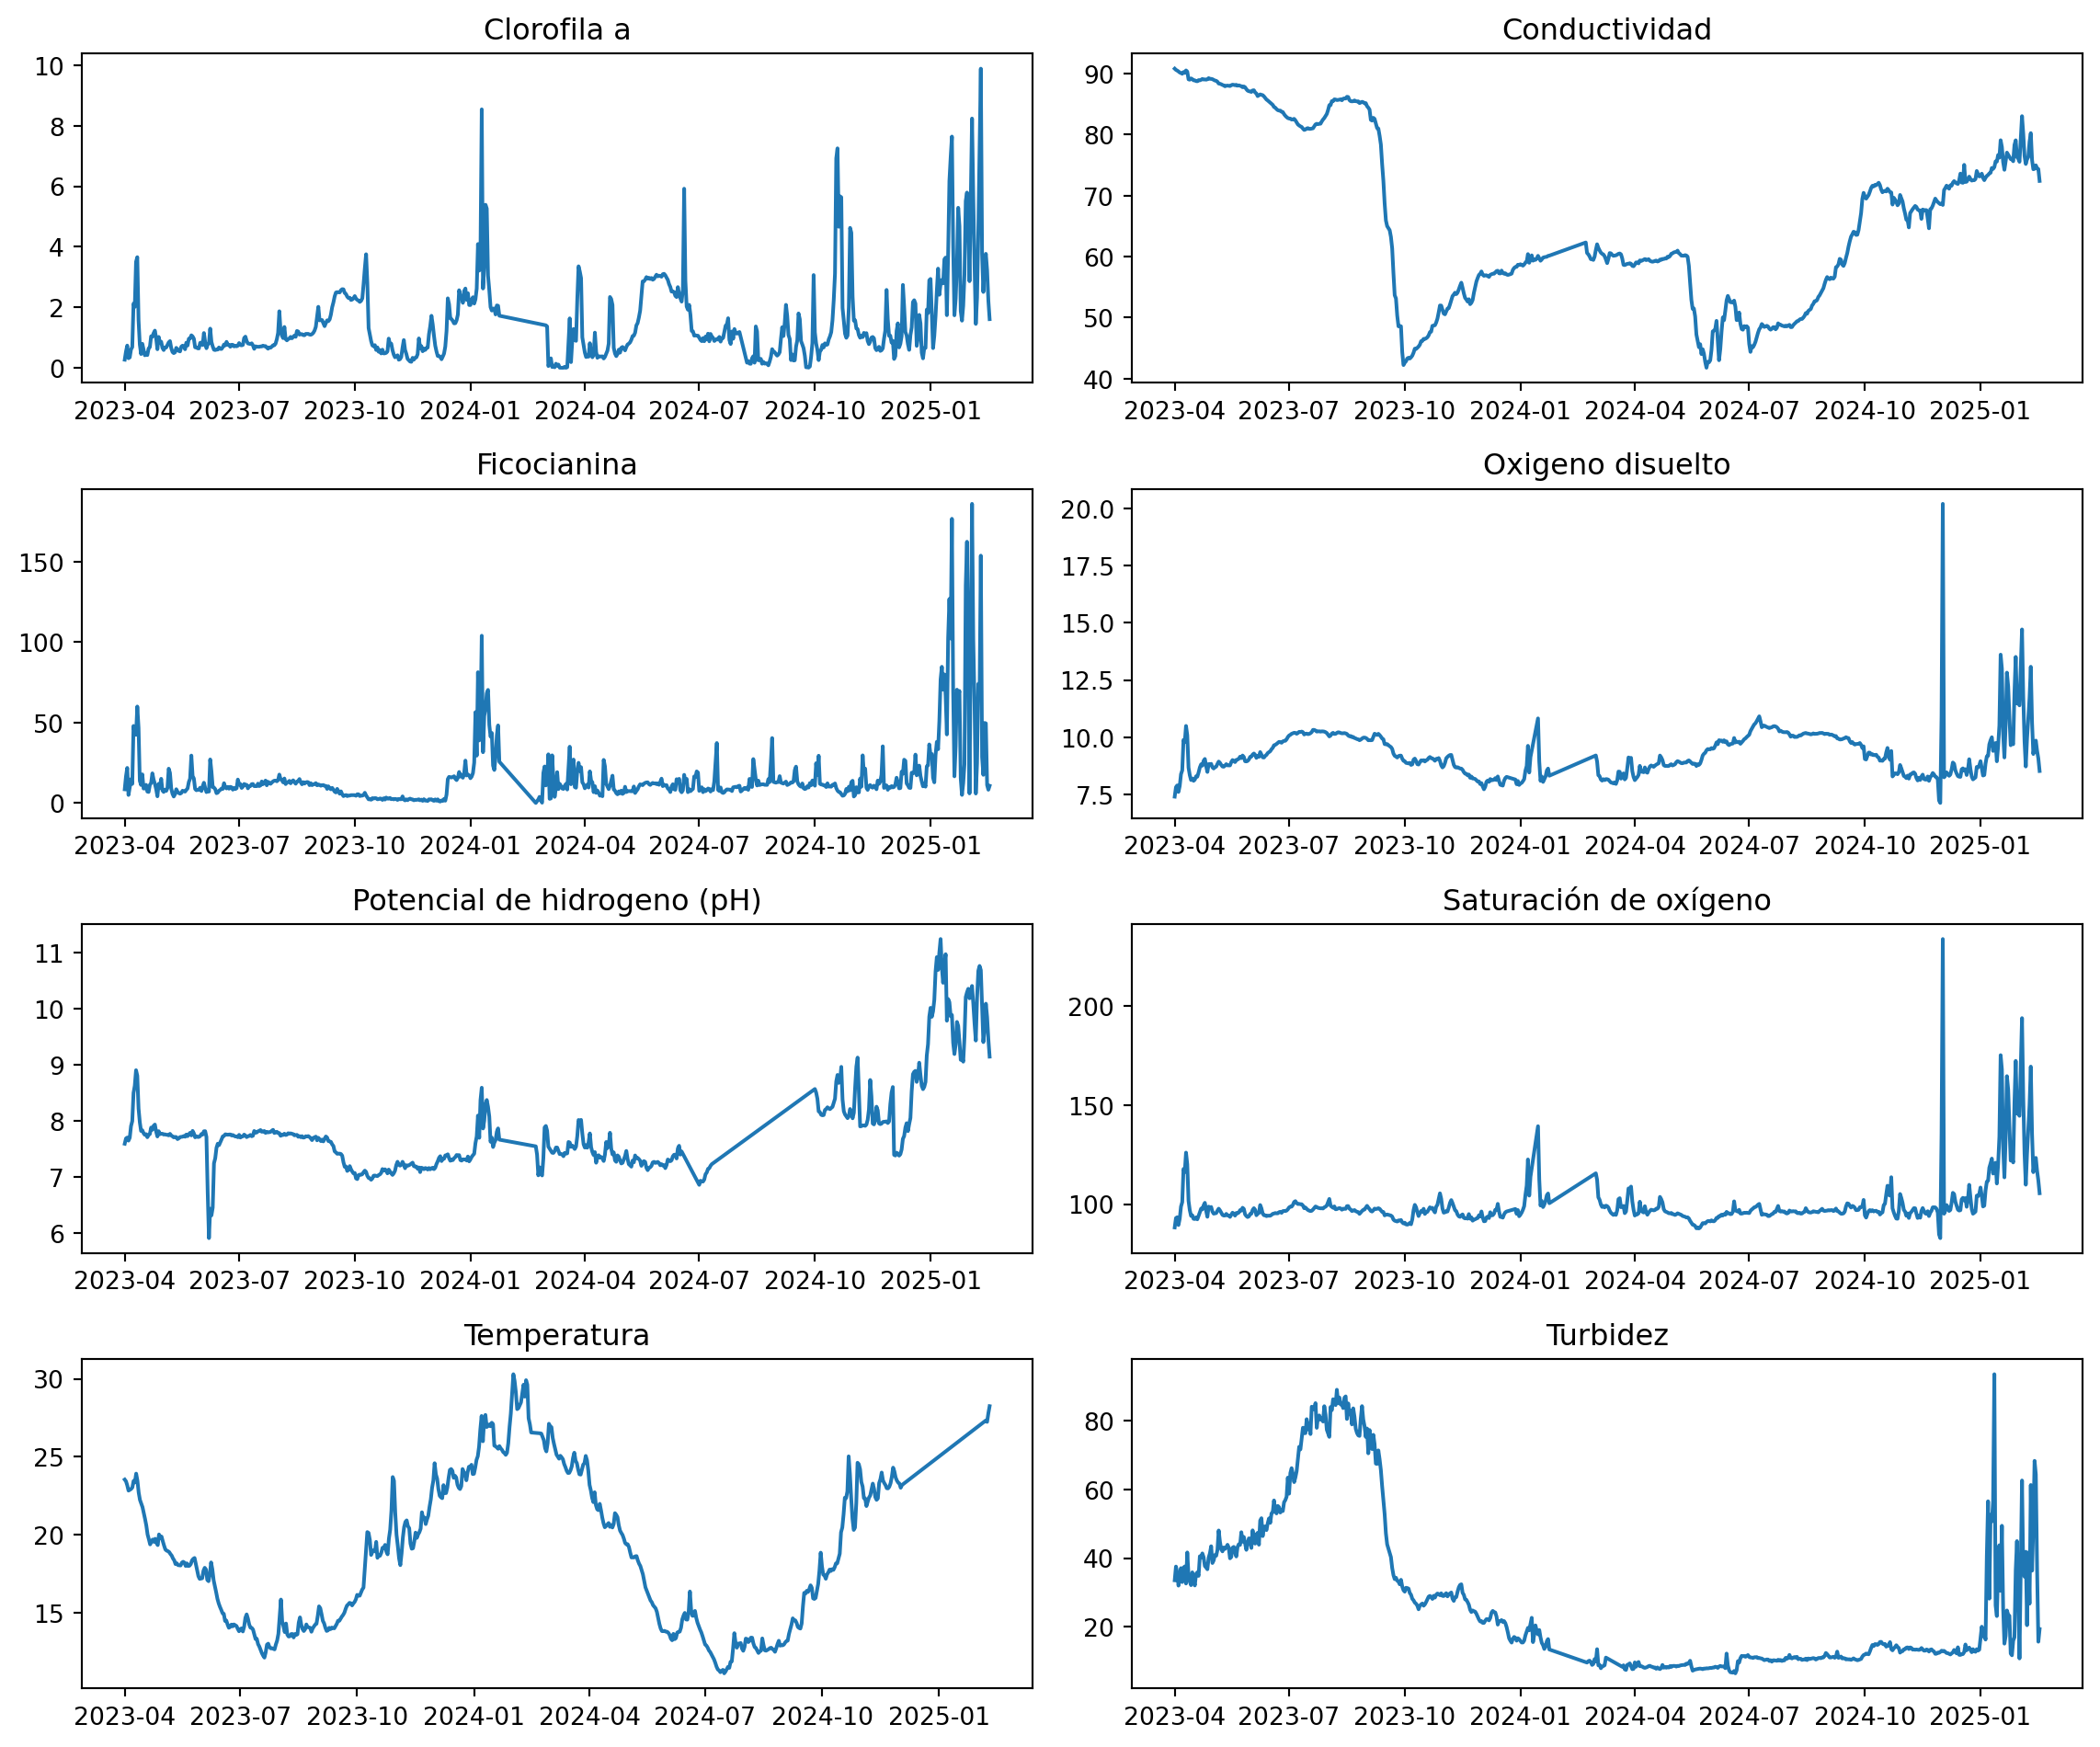

In [4]:
# Obtenha a lista de parâmetros de forma ordenada (caso seja importante a ordem)
unique_params = sorted(daily_mean['Parametro'].unique())

# Cria a figura com 4 linhas e 2 colunas
fig, axs = plt.subplots(4, 2, figsize=(12, 10))
axs = axs.ravel()  # Transforma a matriz de eixos em um vetor para facilitar a iteração

# Itera sobre cada parâmetro para plotar o respectivo gráfico
for i, param in enumerate(unique_params):
    grupo = daily_mean[daily_mean['Parametro'] == param]
    axs[i].plot(grupo['Fecha del dato'], grupo['Valor'], linestyle='-', marker=None)
    axs[i].set_title(param)


plt.tight_layout()
plt.show()

## Bonete

In [5]:
xlsx = glob("./datos/DINACEA_Bonete boya/*.xlsx")
xlsx
df = pd.concat(pd.read_excel(excel_file) for excel_file in xlsx)
df["Fecha del dato"] = pd.to_datetime(df["Fecha del dato"])

daily_mean = df.groupby([df['Fecha del dato'].dt.date, df['Parametro']])['Valor'].mean().to_frame().reset_index()
#daily_mean.head()
daily_mean.groupby('Parametro').Valor.describe()

,count,mean,std,min,25%,50%,75%,max
Parametro,,,,,,,,
Clorofila a,675.0,1.008801,72.178226,-1870.602458,2.993135,4.283979,5.204227,11.252437
Conductividad,675.0,63.391315,74.509668,-1831.764979,56.448927,64.917000,77.928812,96.370312
Conductividad Específica,464.0,53.673047,217.547848,-4118.966604,58.185953,60.628458,84.333047,90.366354
Ficocianina,675.0,3.849376,73.317191,-1869.342479,0.000000,0.150646,10.493016,112.859333
Oxigeno disuelto,624.0,11.576487,81.907284,-1866.674063,8.121786,8.638275,9.187110,288.684083
Potencial de hidrogeno (pH),675.0,5.053239,72.216481,-1867.919146,7.321628,7.578479,7.913417,22.453104
Saturación de oxígeno,675.0,152.446960,407.165483,-4075.669479,93.667235,95.764542,99.494896,3349.658187
Temperatura,675.0,17.362142,72.383982,-1855.727479,15.570665,19.866542,24.757979,30.090250
Turbidez,675.0,24.324820,73.546867,-1850.094146,18.865813,24.386792,29.743500,102.387479


**OBSERVACIÓN:** Se pudo observar que algunos parámetros poseen valores negativos. Imaginan se tratar de algún tipo de error, el gráfico a seguir considera solamente los registros con valores mayores o iguales a 0.

**Análisis de serie temporal de los valores >= 0**

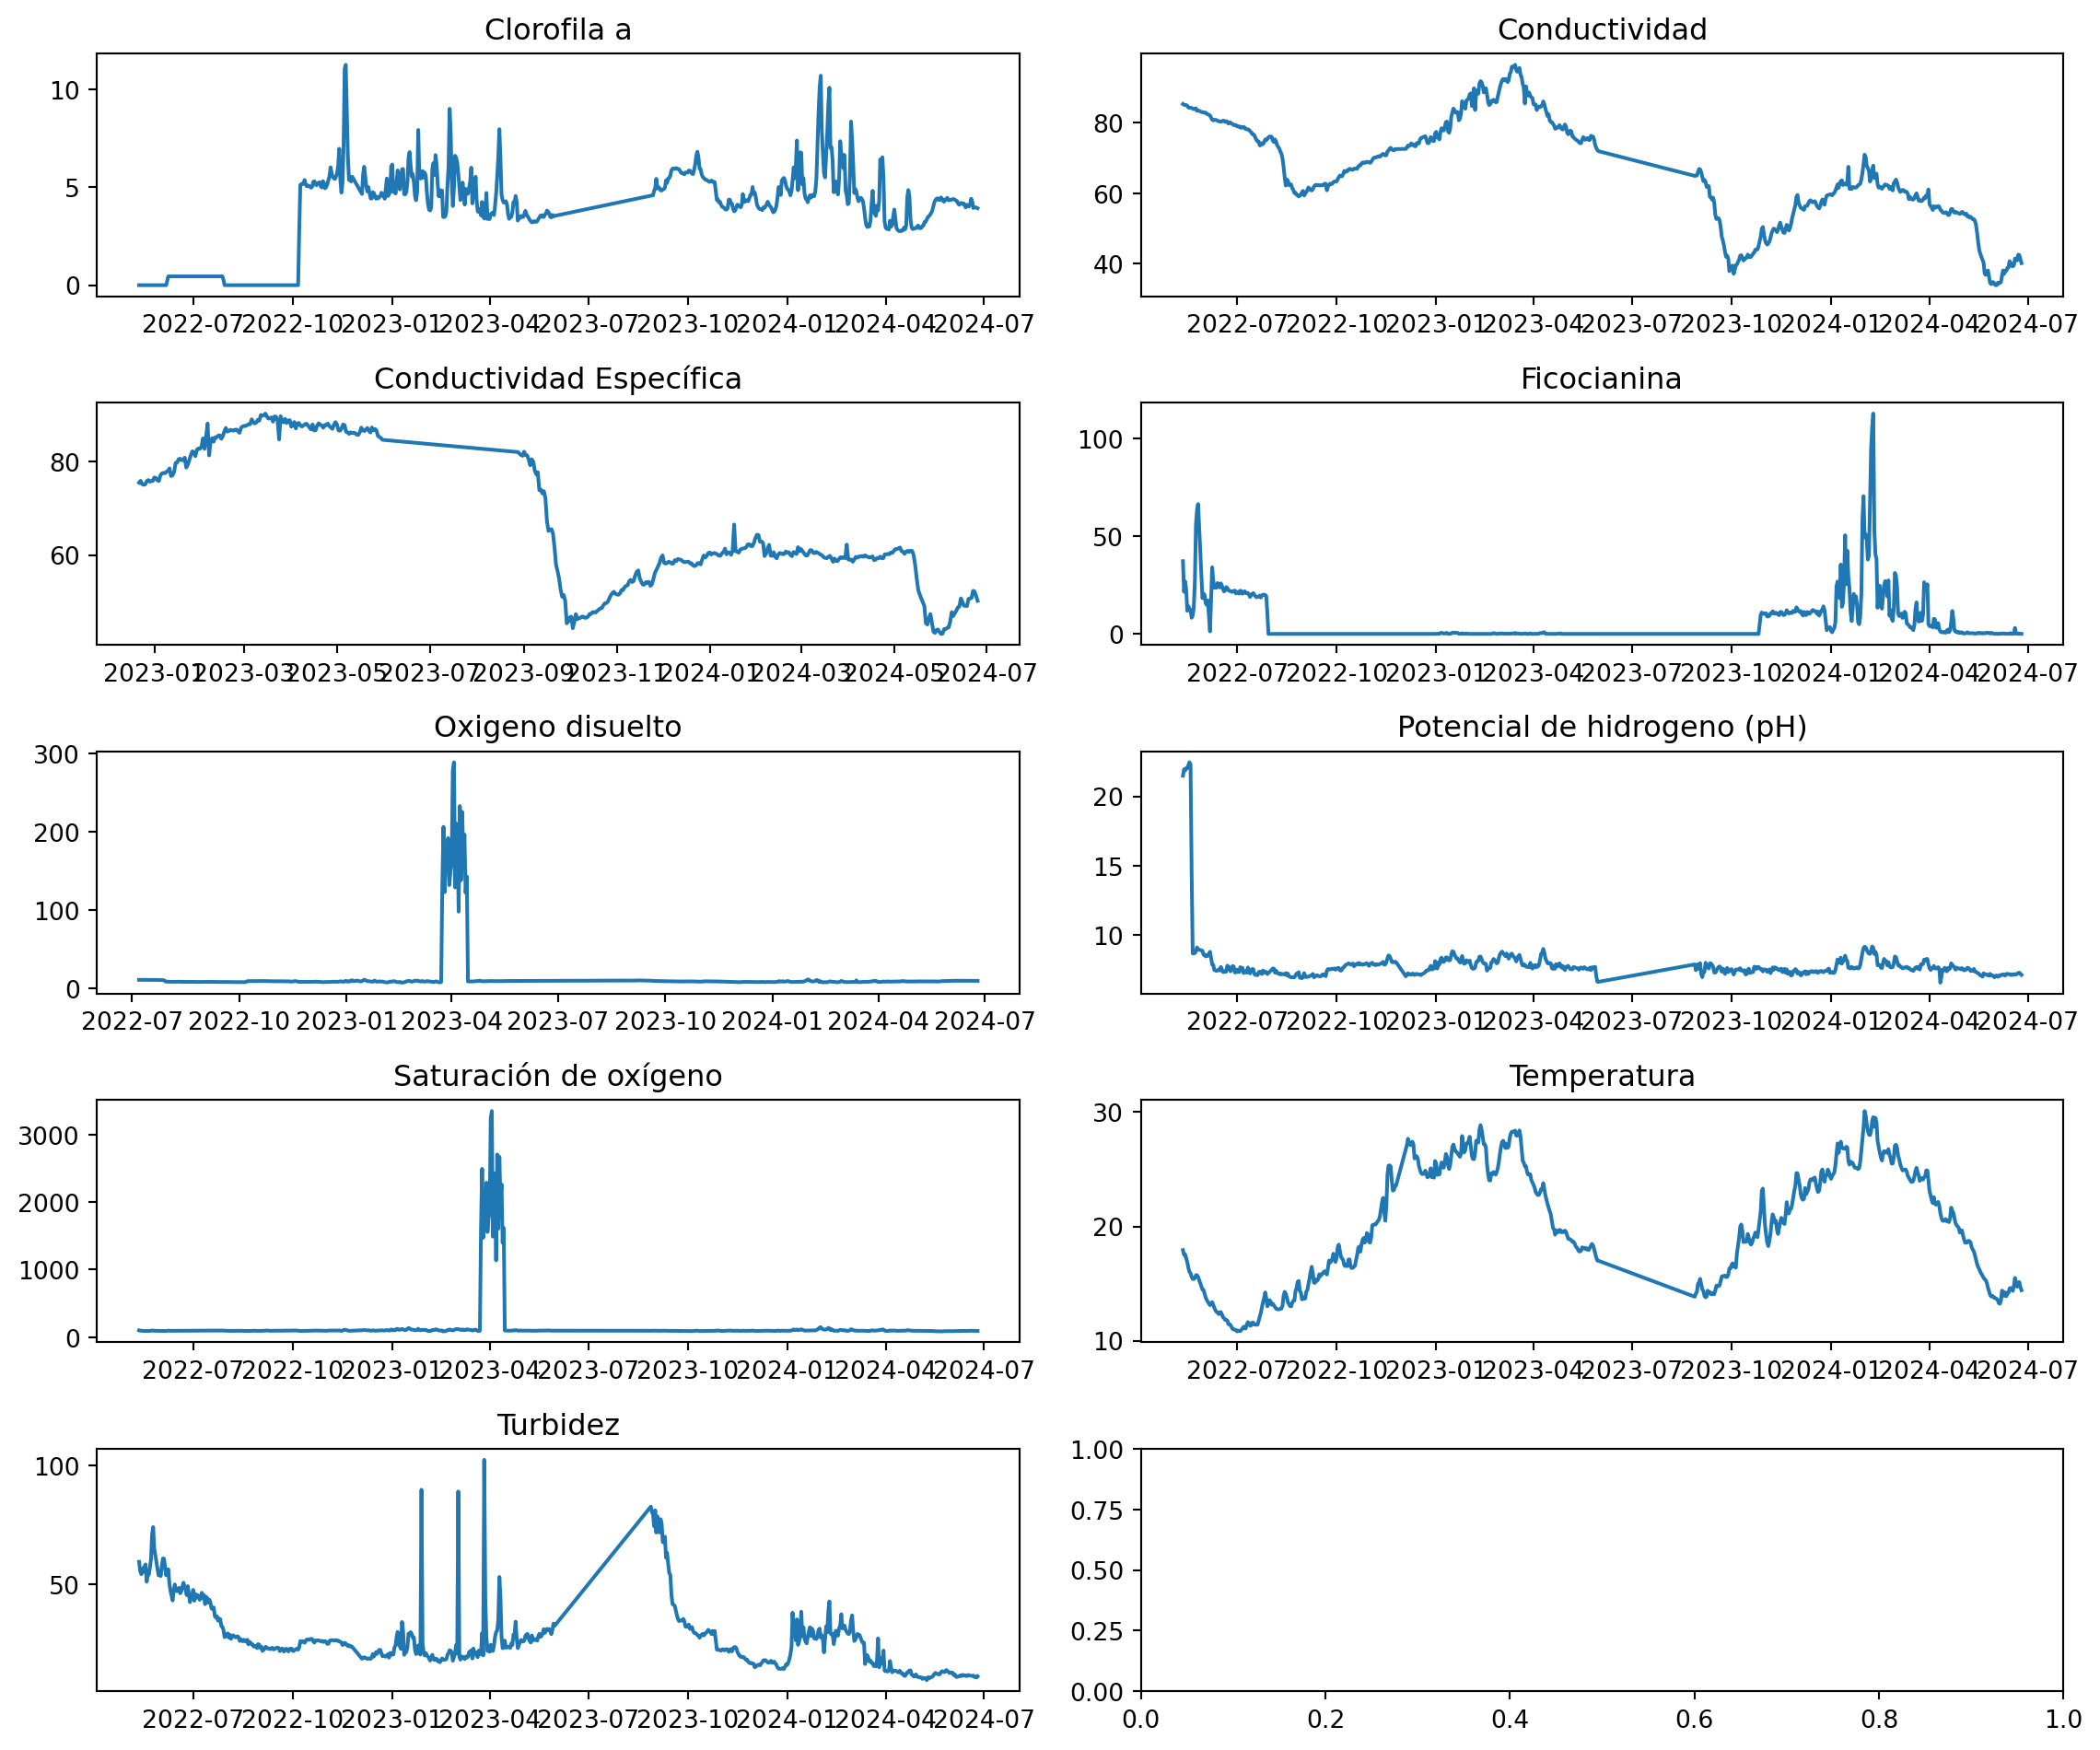

In [6]:
# Obtenha a lista de parâmetros de forma ordenada (caso seja importante a ordem)
unique_params = sorted(daily_mean['Parametro'].unique())
daily_mean = daily_mean[daily_mean["Valor"] >= 0]
# Cria a figura com 4 linhas e 2 colunas
fig, axs = plt.subplots(5, 2, figsize=(12, 10))
axs = axs.ravel()  # Transforma a matriz de eixos em um vetor para facilitar a iteração

# Itera sobre cada parâmetro para plotar o respectivo gráfico
for i, param in enumerate(unique_params):
    grupo = daily_mean[daily_mean['Parametro'] == param]
    axs[i].plot(grupo['Fecha del dato'], grupo['Valor'], linestyle='-', marker=None)
    axs[i].set_title(param)


plt.tight_layout()
plt.show()

## Baygorria

In [7]:
# Coordenadas dos pontos com nomes
pontos = [
    {"coordenadas": (-32.879164, -56.802524), "nombre": "Baygorria"},
    {"coordenadas": (-32.876048, -56.798609), "nombre": "boya baygorria"}
]

# Criar o mapa centralizado no primeiro ponto
m = folium.Map(location=pontos[0]["coordenadas"], zoom_start=15)

# Adicionar os marcadores
for ponto in pontos:
    folium.Marker(location=ponto["coordenadas"], popup=ponto["nombre"]).add_to(m)

# Exibir o mapa
m

In [8]:
xlsx = glob("./datos/Blanvira_Baygorria/*.xlsx")
xlsx
df = pd.concat(pd.read_excel(excel_file) for excel_file in xlsx)
df["Fecha del dato"] = pd.to_datetime(df["Fecha del dato"])
#df.head()
daily_mean = df.groupby([df['Fecha del dato'].dt.date, df['Parametro']])['Valor'].mean().to_frame().reset_index()
#daily_mean.head()
daily_mean.groupby('Parametro').Valor.describe()

,count,mean,std,min,25%,50%,75%,max
Parametro,,,,,,,,
Clorofila a,689.0,1.265030,1.240438,0.000000,0.340625,1.026396,1.715833,7.613125
Conductividad,689.0,83.417060,21.123450,45.079583,67.593125,80.971379,98.697292,141.766458
Ficocianina,687.0,11.463759,11.213652,0.016458,5.496979,8.535500,13.098917,76.710625
Oxigeno disuelto,689.0,9.280372,1.065965,6.580208,8.445417,9.234937,10.081250,11.809500
Potencial de hidrogeno (pH),605.0,7.540362,0.355714,6.480968,7.335104,7.533125,7.743958,8.883958
Saturación de oxígeno,689.0,100.103709,7.119304,75.472292,95.549583,98.284792,105.065417,130.297292
Temperatura,689.0,19.410034,4.873003,10.586250,14.543333,19.111250,23.902708,28.826458
Turbidez,678.0,23.557173,14.875827,8.530000,12.704740,16.426458,30.761823,77.539396


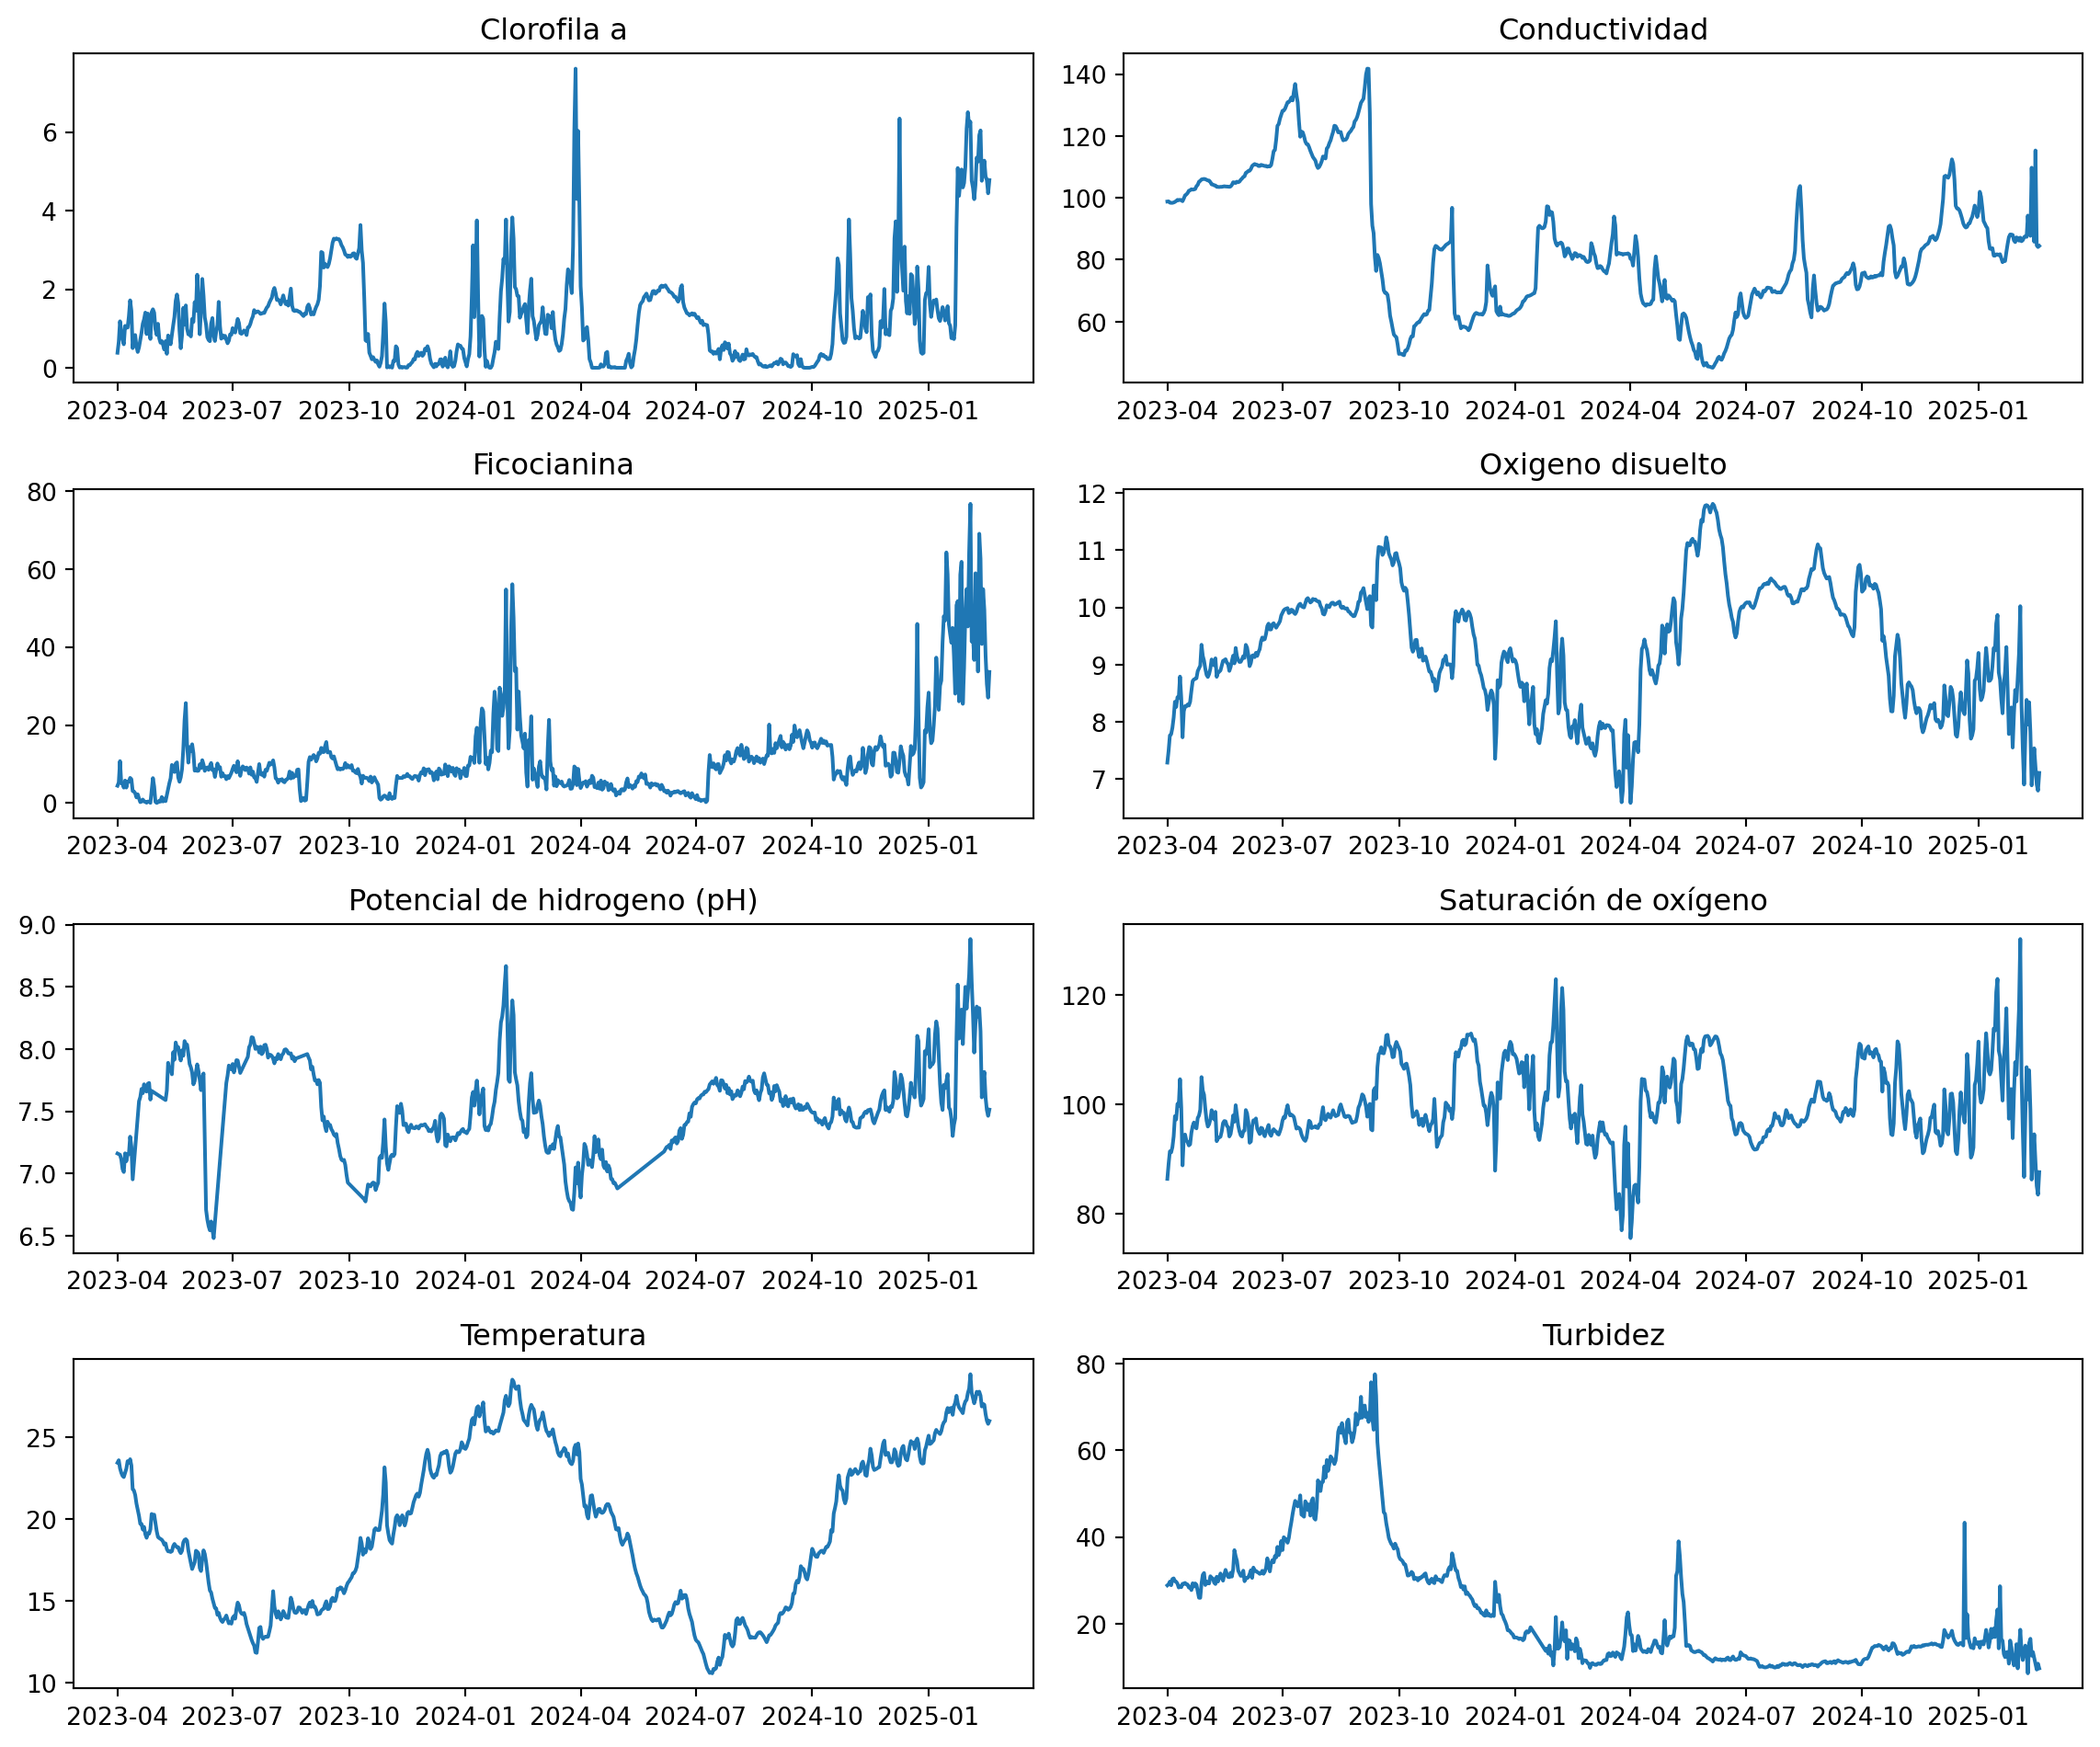

In [9]:
# Obtenha a lista de parâmetros de forma ordenada (caso seja importante a ordem)
unique_params = sorted(daily_mean['Parametro'].unique())

# Cria a figura com 4 linhas e 2 colunas
fig, axs = plt.subplots(4, 2, figsize=(12, 10))
axs = axs.ravel()  # Transforma a matriz de eixos em um vetor para facilitar a iteração

# Itera sobre cada parâmetro para plotar o respectivo gráfico
for i, param in enumerate(unique_params):
    grupo = daily_mean[daily_mean['Parametro'] == param]
    axs[i].plot(grupo['Fecha del dato'], grupo['Valor'], linestyle='-', marker=None)
    axs[i].set_title(param)


plt.tight_layout()
plt.show()

## Boya Baygorria

In [10]:
xlsx = glob("./datos/Blanvira_Blanvira boya/*.xlsx")
xlsx
df = pd.concat(pd.read_excel(excel_file) for excel_file in xlsx)
df["Fecha del dato"] = pd.to_datetime(df["Fecha del dato"])
#df.head()
daily_mean = df.groupby([df['Fecha del dato'].dt.date, df['Parametro']])['Valor'].mean().to_frame().reset_index()
#daily_mean.head()
daily_mean.groupby('Parametro').Valor.describe()

,count,mean,std,min,25%,50%,75%,max
Parametro,,,,,,,,
Clorofila a,659.0,0.943953,0.774485,0.000000,0.365576,0.825625,1.250594,5.146250
Conductividad,659.0,91.888181,27.265346,48.285625,70.371740,85.143542,109.100000,208.280000
Ficocianina,659.0,9.622745,11.115631,0.000000,5.085240,6.899146,10.690313,113.586667
Oxigeno disuelto,659.0,9.512705,1.408716,5.639583,8.251592,9.638542,10.453854,12.497708
Potencial de hidrogeno (pH),659.0,7.601219,1.424427,6.248333,7.153854,7.386250,7.581719,38.640000
Saturación de oxígeno,659.0,102.260440,10.595007,65.867917,95.767611,98.934167,108.905937,126.333308
Temperatura,630.0,19.164829,4.796920,11.082500,14.340521,18.900312,23.765208,27.688542
Turbidez,520.0,18.991649,15.503483,7.162250,11.259193,12.477250,19.998906,189.358958


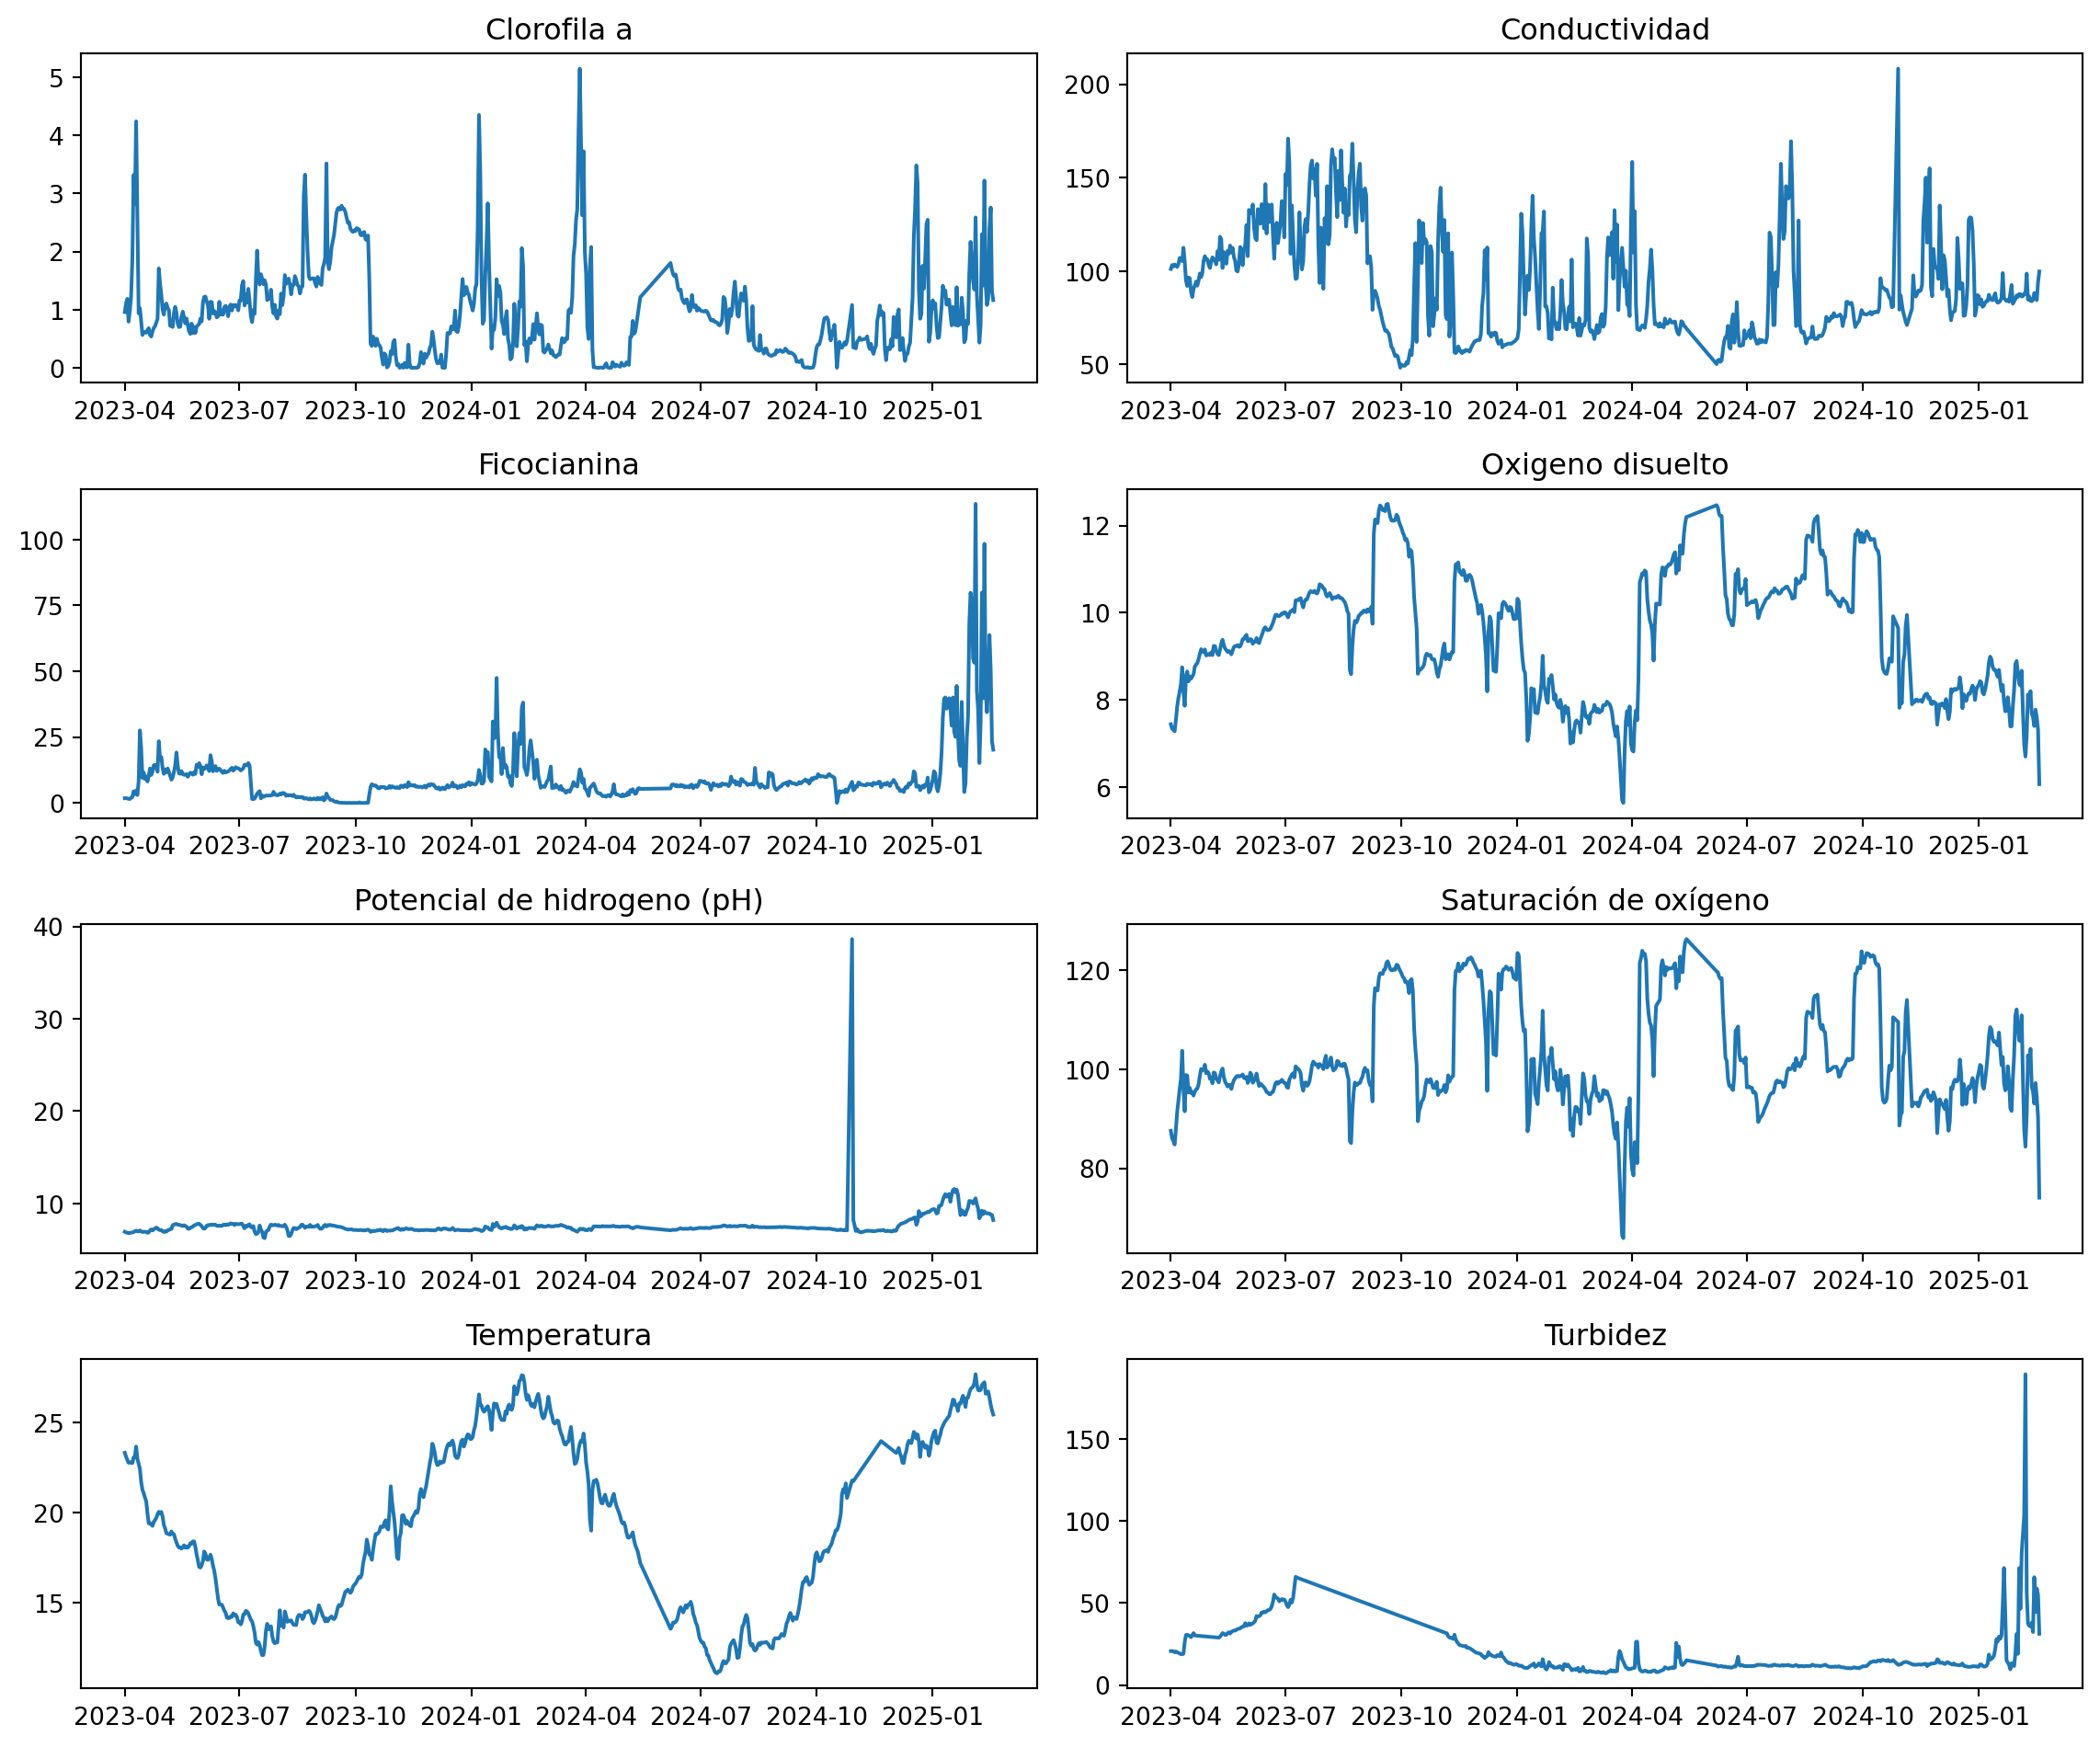

In [11]:
# Obtenha a lista de parâmetros de forma ordenada (caso seja importante a ordem)
unique_params = sorted(daily_mean['Parametro'].unique())

# Cria a figura com 4 linhas e 2 colunas
fig, axs = plt.subplots(4, 2, figsize=(12, 10))
axs = axs.ravel()  # Transforma a matriz de eixos em um vetor para facilitar a iteração

# Itera sobre cada parâmetro para plotar o respectivo gráfico
for i, param in enumerate(unique_params):
    grupo = daily_mean[daily_mean['Parametro'] == param]
    axs[i].plot(grupo['Fecha del dato'], grupo['Valor'], linestyle='-', marker=None)
    axs[i].set_title(param)


plt.tight_layout()
plt.show()

## Palmar

In [12]:
# Coordenadas do ponto com nome
pontos = [
    {"coordenadas": (-33.066971, -57.454109), "nombre": "Palmar"}
]

# Criar o mapa centralizado no ponto
m = folium.Map(location=pontos[0]["coordenadas"], zoom_start=15)

# Adicionar o marcador
folium.Marker(location=pontos[0]["coordenadas"], popup=pontos[0]["nombre"]).add_to(m)

# Exibir o mapa
m

In [13]:
xlsx = glob("./datos/DINACEA_Palmar boya/*.xlsx")
xlsx
df = pd.concat(pd.read_excel(excel_file) for excel_file in xlsx)
df["Fecha del dato"] = pd.to_datetime(df["Fecha del dato"])
#df.head()
daily_mean = df.groupby([df['Fecha del dato'].dt.date, df['Parametro']])['Valor'].mean().to_frame().reset_index()
#daily_mean.head()
daily_mean.groupby('Parametro').Valor.describe()

,count,mean,std,min,25%,50%,75%,max
Parametro,,,,,,,,
Clorofila a,681.0,-3.379715e+03,1.807823e+04,-99999.000000,3.993804,4.665780,5.298292,9.085000e+00
Conductividad,681.0,-3.304463e+03,1.809234e+04,-99999.000000,64.819860,82.051687,98.251479,1.870463e+02
Conductividad Específica,462.0,4.155349e+08,7.084540e+09,-7087.530714,64.068592,73.809443,94.247448,1.493646e+11
Ficocianina,681.0,-3.378864e+03,1.807839e+04,-99999.000000,0.000250,1.766729,9.571718,5.498066e+01
Oxigeno disuelto,630.0,7.450025e+09,6.208433e+10,-7134.444500,6.473932,7.752854,9.107253,1.012208e+12
Saturación de oxígeno,681.0,-3.246670e+03,1.810714e+04,-99999.000000,90.361809,96.428045,101.098804,3.318734e+03
Temperatura,681.0,-3.368408e+03,1.808062e+04,-99999.000000,15.024646,19.824609,25.282923,2.940707e+01
Turbidez,681.0,-3.370524e+03,1.808022e+04,-99999.000000,11.317000,13.602870,24.118727,5.633998e+01


**OBSERVACIÓN:** Se pudo observar que algunos parámetros poseen valores negativos. Imaginan se tratar de algún tipo de error, el gráfico a seguir considera solamente los registros con valores mayores o iguales a 0.

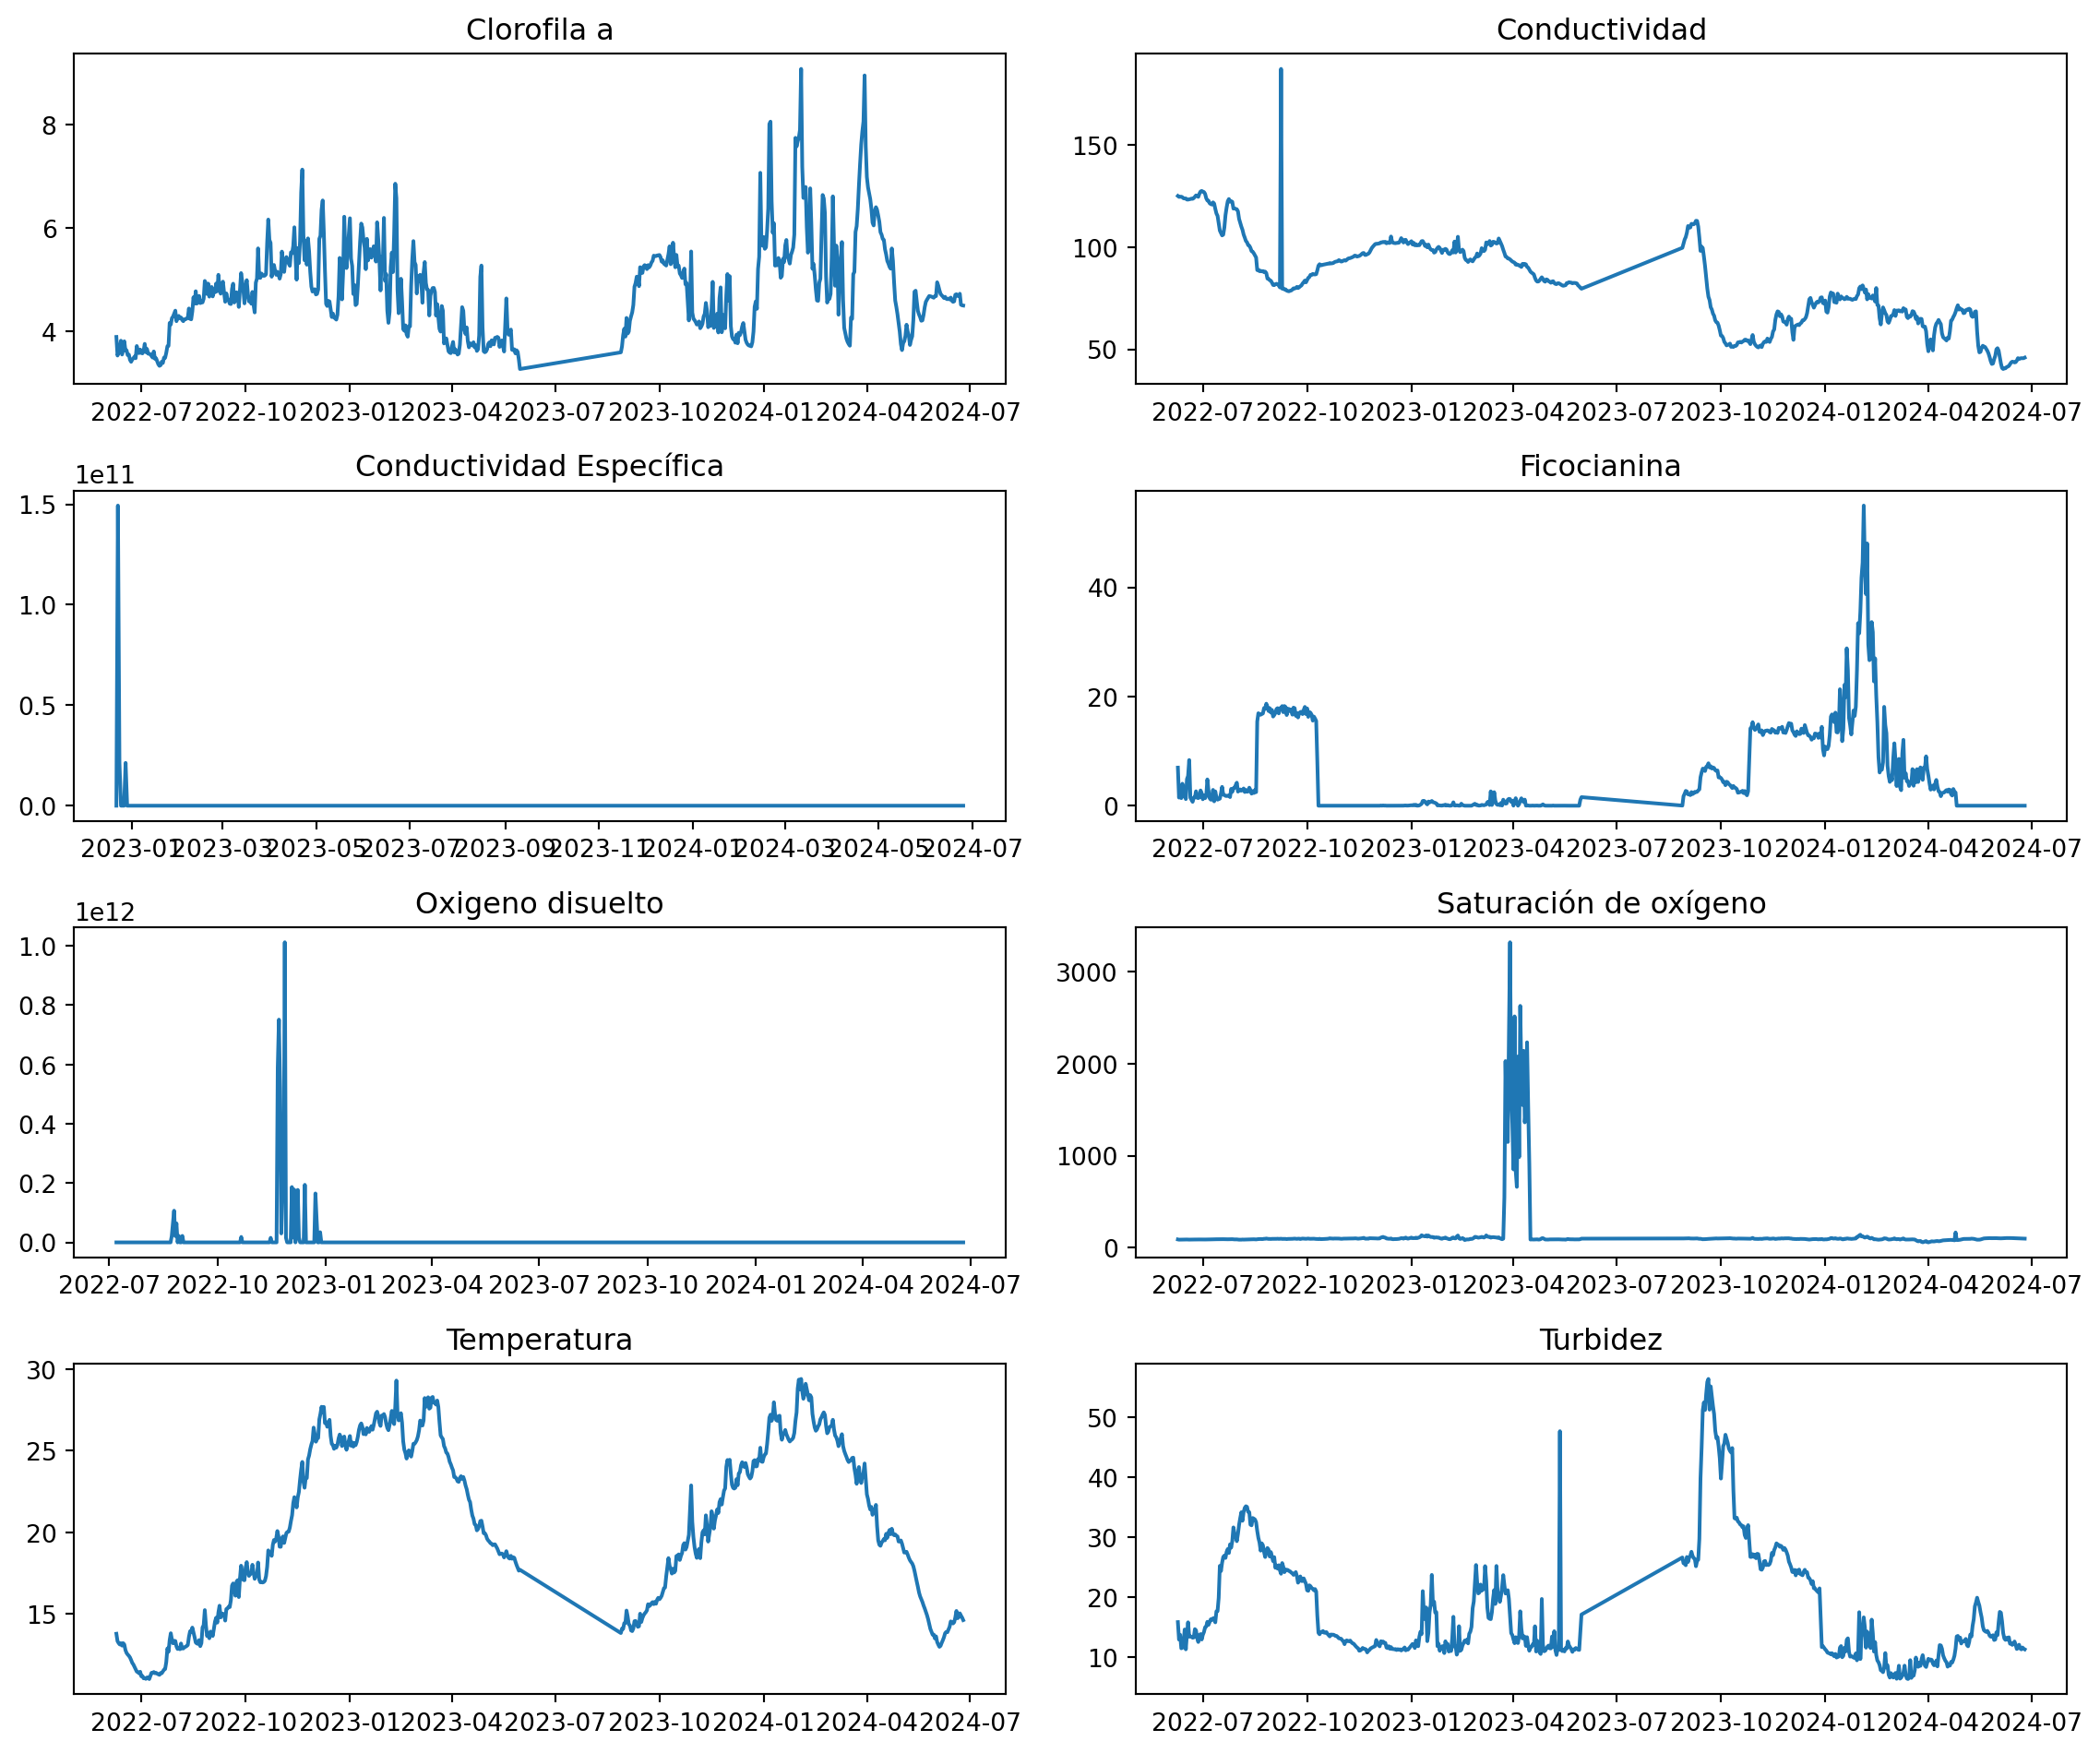

In [14]:
# Obtenha a lista de parâmetros de forma ordenada (caso seja importante a ordem)
unique_params = sorted(daily_mean['Parametro'].unique())
daily_mean = daily_mean[daily_mean["Valor"] >= 0]
# Cria a figura com 4 linhas e 2 colunas
fig, axs = plt.subplots(4, 2, figsize=(12, 10))
axs = axs.ravel()  # Transforma a matriz de eixos em um vetor para facilitar a iteração

# Itera sobre cada parâmetro para plotar o respectivo gráfico
for i, param in enumerate(unique_params):
    grupo = daily_mean[daily_mean['Parametro'] == param]
    axs[i].plot(grupo['Fecha del dato'], grupo['Valor'], linestyle='-', marker=None)
    axs[i].set_title(param)


plt.tight_layout()
plt.show()